In [36]:
import numpy as np
import astropy.io.fits as pf
import pylab as mplot
%pylab inline
import os
import treecorr

Populating the interactive namespace from numpy and matplotlib


In [71]:
psf_files = os.listdir('/Users/chihwaychang/Work/shearcat/data/SN20')

In [72]:
T = []
T_mod = []
e1 = []
e1_mod = []
e2 = []
e2_mod = []
ra = []
dec = []
snr = []

for ff in psf_files:
    infile = pf.open('/Users/chihwaychang/Work/shearcat/data/SN20/'+ff)[1].data
    mask = (infile['IMAFLAGS_ISO']==0)
    T.append(infile['T_star_hsm'][mask])
    T_mod.append(infile['T_model_hsm'][mask])
    e1.append(infile['g1_star_hsm'][mask])
    e1_mod.append(infile['g1_model_hsm'][mask])
    e2.append(infile['g2_star_hsm'][mask])
    e2_mod.append(infile['g2_model_hsm'][mask])
    ra.append(infile['ra'][mask])
    dec.append(infile['dec'][mask])
    snr.append(infile['FLUX_APER_8'][mask]/infile['FLUXERR_APER_8'][mask])
    

<ipython-input-72-13fc0b33e122>:22: RuntimeWarning: invalid value encountered in true_divide
  snr.append(infile['FLUX_APER_8'][mask]/infile['FLUXERR_APER_8'][mask])


In [73]:
T = np.hstack(np.array(T))
T_mod = np.hstack(np.array(T_mod))
e1 = np.hstack(np.array(e1))
e1_mod = np.hstack(np.array(e1_mod))
e2 = np.hstack(np.array(e2))
e2_mod = np.hstack(np.array(e2_mod))
ra = np.hstack(np.array(ra))
dec = np.hstack(np.array(dec))
snr = np.hstack(np.array(snr))

<ipython-input-73-1eb1d3fdd7ee>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  T = np.hstack(np.array(T))
<ipython-input-73-1eb1d3fdd7ee>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  T_mod = np.hstack(np.array(T_mod))
<ipython-input-73-1eb1d3fdd7ee>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  e1 = np.hstack(np.array(e1))
<ip

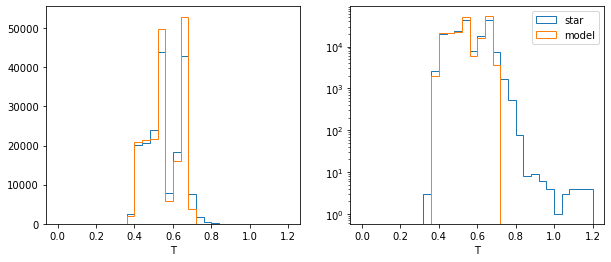

In [74]:
mplot.figure(figsize=(10,4))

mplot.subplot(121)
mplot.hist(T, range=(0,1.2), bins=30, histtype='step')
mplot.hist(T_mod, range=(0,1.2), bins=30, histtype='step')
mplot.xlabel('T')

mplot.subplot(122)
mplot.hist(T, range=(0,1.2), bins=30, histtype='step', label='star')
mplot.hist(T_mod, range=(0,1.2), bins=30, histtype='step', label='model')
mplot.xlabel('T')
mplot.legend()
mplot.yscale('log')

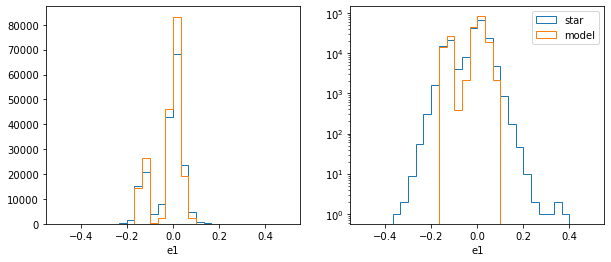

In [75]:
mplot.figure(figsize=(10,4))

mplot.subplot(121)
mplot.hist(e1, range=(-0.5,0.5), bins=30, histtype='step')
mplot.hist(e1_mod, range=(-0.5,0.5), bins=30, histtype='step')
mplot.xlabel('e1')

mplot.subplot(122)
mplot.hist(e1, range=(-0.5,0.5), bins=30, histtype='step', label='star')
mplot.hist(e1_mod, range=(-0.5,0.5), bins=30, histtype='step', label='model')
mplot.legend()
mplot.xlabel('e1')
mplot.yscale('log')

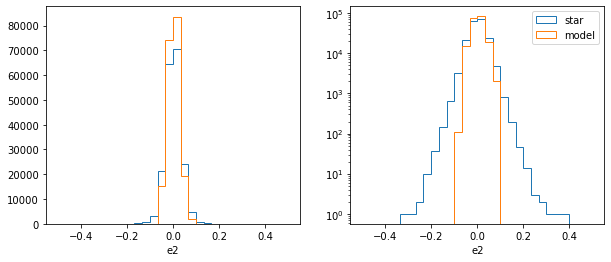

In [76]:
mplot.figure(figsize=(10,4))

mplot.subplot(121)
mplot.hist(e2, range=(-0.5,0.5), bins=30, histtype='step')
mplot.hist(e2_mod, range=(-0.5,0.5), bins=30, histtype='step')
mplot.xlabel('e2')

mplot.subplot(122)
mplot.hist(e2, range=(-0.5,0.5), bins=30, histtype='step', label='star')
mplot.hist(e2_mod, range=(-0.5,0.5), bins=30, histtype='step', label='model')
mplot.legend()
mplot.xlabel('e2')
mplot.yscale('log')

In [77]:
d_e1 = e1-e1_mod
d_e2 = e2-e2_mod

d_e1 = np.nan_to_num(d_e1)
d_e2 = np.nan_to_num(d_e2)
mask = (d_e1!=0)*(d_e2!=0)
d_e1 = d_e1[mask]
d_e2 = d_e2[mask]
ra = ra[mask]
dec = dec[mask]
snr = snr[mask]
E1 = e1[mask]
E2 = e2[mask]


(array([1.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00,
        1.0000e+00, 3.0000e+00, 5.0000e+00, 0.0000e+00, 4.5000e+01,
        1.1550e+03, 8.0570e+03, 1.7392e+04, 1.8082e+04, 1.6819e+04,
        1.5592e+04, 1.4035e+04, 1.3229e+04, 1.1977e+04, 1.0951e+04,
        1.0245e+04, 9.2700e+03, 8.4860e+03, 7.8370e+03, 7.0270e+03,
        6.1640e+03, 5.5060e+03, 4.5650e+03, 2.9410e+03, 6.3200e+02]),
 array([-0.6383111 , -0.5020777 , -0.36584434, -0.22961096, -0.09337758,
         0.04285579,  0.17908916,  0.31532255,  0.4515559 ,  0.5877893 ,
         0.7240227 ,  0.860256  ,  0.9964894 ,  1.1327227 ,  1.2689562 ,
         1.4051895 ,  1.541423  ,  1.6776563 ,  1.8138896 ,  1.9501231 ,
         2.0863564 ,  2.2225897 ,  2.358823  ,  2.4950566 ,  2.63129   ,
         2.7675233 ,  2.9037566 ,  3.03999   ,  3.1762235 ,  3.3124568 ,
         3.4486902 ], dtype=float32),
 <BarContainer object of 30 artists>)

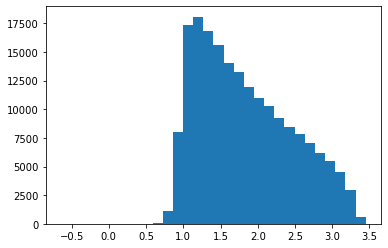

In [78]:
mplot.hist(np.log10(snr), bins=30)

In [79]:
cat = treecorr.Catalog(ra=ra, dec=dec, ra_units='degrees', dec_units='degrees', g1=d_e1, g2=d_e2) #, npatch=20)
gg = treecorr.GGCorrelation(min_sep=0.5, max_sep=250., nbins=20, bin_slop=0.01, sep_units='arcmin') #, var_method='jackknife')
gg.process(cat)
xip = gg.xip  # The xi_plus correlation function
xim = gg.xim  # The xi_minus correlation function
theta = np.exp(gg.meanlogr)

In [80]:
# cov_jk = gg.estimate_cov('jackknife')
# mplot.imshow(cov_jk)

In [81]:
# dir(gg)

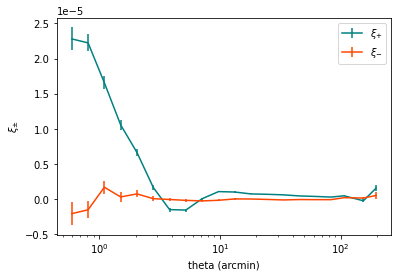

In [82]:
# mplot.errorbar(theta, xip, np.diag(cov_jk[:20])**0.5, label='$\\xi_{+}$', color='teal')
# mplot.errorbar(theta, xim, np.diag(cov_jk[20:])**0.5, label='$\\xi_{-}$', color='orangered')

mplot.errorbar(theta, xip, gg.varxip**0.5, label='$\\xi_{+}$', color='teal')
mplot.errorbar(theta, xim, gg.varxim**0.5, label='$\\xi_{-}$', color='orangered')

mplot.xscale('log')
mplot.xlabel('theta (arcmin)')
mplot.ylabel('$\\xi_{\pm}$')
mplot.legend()

In [83]:
# rho1_y1 = np.loadtxt('rho1_Y1.txt')
# print(rho1_y1)

No handles with labels found to put in legend.


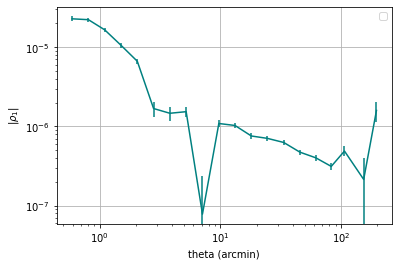

In [84]:
mplot.errorbar(theta, np.abs(xip), gg.varxip**0.5, color='teal')
# mplot.errorbar(np.exp(rho1_y1[:,2]), np.abs(rho1_y1[:,3]), rho1_y1[:,6], color='orangered', label='y1 from Lucas')

# mplot.errorbar(theta, xim, gg.varxim**0.5, label='$\\xi_{-}$', color='orangered')

mplot.xscale('log')
mplot.yscale('log')
mplot.xlabel('theta (arcmin)')
mplot.ylabel('$|\\rho_1|$')
mplot.legend()
# mplot.ylim(1e-9,6e-6)
mplot.grid()

# np.savez('SN80.npz', theta=theta, xip=np.abs(xip), err=gg.varxip**0.5)

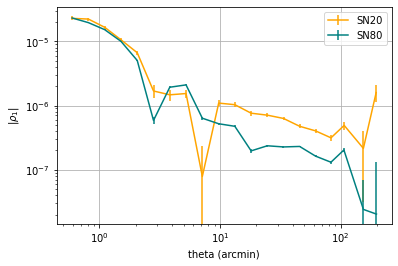

In [85]:
SN80 = np.load('SN80.npz')
SN20 = np.load('SN20.npz')

mplot.errorbar(SN20['theta'], SN20['xip'], SN20['err'], color='orange', label='SN20')
mplot.errorbar(SN80['theta'], SN80['xip'], SN80['err'], color='teal', label='SN80')
# mplot.errorbar(np.exp(rho1_y1[:,2]), np.abs(rho1_y1[:,3]), rho1_y1[:,6], color='orangered', label='y1 from Lucas')

# mplot.errorbar(theta, xim, gg.varxim**0.5, label='$\\xi_{-}$', color='orangered')

mplot.xscale('log')
mplot.yscale('log')
mplot.xlabel('theta (arcmin)')
mplot.ylabel('$|\\rho_1|$')
mplot.legend()
# mplot.ylim(1e-9,6e-6)
mplot.grid()

In [86]:
# cat = treecorr.Catalog(ra=ra, dec=dec, ra_units='degrees', dec_units='degrees', g1=d_e1-np.mean(d_e1), g2=d_e2-np.mean(d_e2), npatch=20)
# gg = treecorr.GGCorrelation(min_sep=2., max_sep=250., nbins=20, bin_slop=0.2, sep_units='arcmin', var_method='jackknife')
# gg.process(cat)
# xip = gg.xip  # The xi_plus correlation function
# xim = gg.xim  # The xi_minus correlation function
# theta = np.exp(gg.meanlogr)

In [87]:
# cov_jk = gg.estimate_cov('jackknife')
# mplot.imshow(cov_jk)

In [88]:
# mplot.errorbar(theta, xip, np.diag(cov_jk[:20])**0.5, label='$\\xi_{+}$', color='teal')
# mplot.errorbar(theta, xim, np.diag(cov_jk[20:])**0.5, label='$\\xi_{-}$', color='orangered')

# mplot.xscale('log')
# mplot.xlabel('theta (arcmin)')
# mplot.ylabel('$\\xi_{\pm}$')
# mplot.legend()

In [89]:
# mplot.errorbar(theta, xip, np.diag(cov_jk[:20])**0.5, label='$\\xi_{+}$', color='teal')
# mplot.errorbar(theta, xim, np.diag(cov_jk[20:])**0.5, label='$\\xi_{-}$', color='orangered')

# mplot.xscale('log')
# mplot.yscale('log')
# mplot.xlabel('theta (arcmin)')
# mplot.ylabel('$\\xi_{\pm}$')
# mplot.legend()

In [90]:
cat1 = treecorr.Catalog(ra=ra, dec=dec, ra_units='degrees', dec_units='degrees', g1=d_e1, g2=d_e2)
cat2 = treecorr.Catalog(ra=ra, dec=dec, ra_units='degrees', dec_units='degrees', g1=E1, g2=E2)

gg = treecorr.GGCorrelation(min_sep=0.5, max_sep=250., nbins=20, bin_slop=0.01, sep_units='arcmin')
gg.process(cat1, cat2)
xip = gg.xip  # The xi_plus correlation function
xim = gg.xim  # The xi_minus correlation function
theta = np.exp(gg.meanlogr)

In [91]:
# rho2_y1 = np.loadtxt('rho2_Y1.txt')
# print(rho2_y1)

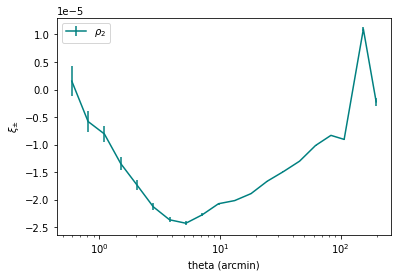

In [92]:
# cov_jk = gg.estimate_cov('jackknife')

mplot.errorbar(theta, xip, gg.varxip**0.5, label='$\\rho_2$', color='teal')
# mplot.errorbar(theta, xim, gg.varxim**0.5, label='$\\xi_{-}$', color='orangered')

mplot.xscale('log')
# mplot.yscale('log')
mplot.xlabel('theta (arcmin)')
mplot.ylabel('$\\xi_{\pm}$')
mplot.legend()

np.savez('SN20_rho2.npz', theta=theta, xip=np.abs(xip), err=gg.varxip**0.5)

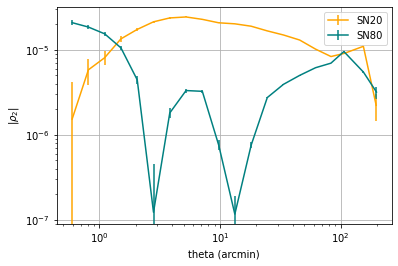

In [93]:
SN80 = np.load('SN80_rho2.npz')
SN20 = np.load('SN20_rho2.npz')

mplot.errorbar(SN20['theta'], SN20['xip'], SN20['err'], color='orange', label='SN20')
mplot.errorbar(SN80['theta'], SN80['xip'], SN80['err'], color='teal', label='SN80')
# mplot.errorbar(np.exp(rho1_y1[:,2]), np.abs(rho1_y1[:,3]), rho1_y1[:,6], color='orangered', label='y1 from Lucas')

# mplot.errorbar(theta, xim, gg.varxim**0.5, label='$\\xi_{-}$', color='orangered')

mplot.xscale('log')
mplot.yscale('log')
mplot.xlabel('theta (arcmin)')
mplot.ylabel('$|\\rho_2|$')
mplot.legend()
# mplot.ylim(1e-9,6e-6)
mplot.grid()

In [63]:

# mplot.errorbar(theta, np.abs(xip), gg.varxip**0.5, color='teal')
# # mplot.errorbar(theta, xim, gg.varxim**0.5, label='$\\xi_{-}$', color='orangered')
# mplot.errorbar(np.exp(rho2_y1[:,2]), np.abs(rho2_y1[:,3]), rho2_y1[:,6], color='orangered', label='y1 from Lucas')

# mplot.xscale('log')
# mplot.yscale('log')
# mplot.ylim(1e-9,1e-5)
# mplot.xlabel('theta (arcmin)')
# mplot.ylabel('$|\\rho_{2}|$')
# # mplot.legend()

In [155]:
gg.varxip

array([2.28771346e-15, 1.24281988e-15, 6.79105357e-16, 3.71735174e-16,
       2.02719744e-16, 1.10575462e-16, 6.02858725e-17, 3.29742576e-17,
       1.80503354e-17, 9.75955767e-18, 5.36356795e-18, 2.97676655e-18,
       1.66905436e-18, 9.49816616e-19, 5.55362252e-19, 3.37736069e-19,
       2.15025512e-19, 1.38930242e-19, 8.33148632e-20, 5.23584716e-20])

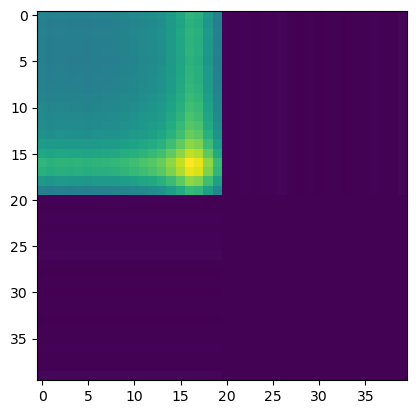

In [86]:
mplot.imshow(cov_jk)

In [208]:
Nstar = []
for ff in psf_files:
    infile = pf.open('/project/chihway/data/decade/psf_cats/'+ff)[1].data
    mask = (infile['IMAFLAGS_ISO']==0)
    T=infile['T_star_hsm'][mask]
    T_mod=infile['T_model_hsm'][mask]
    e1=infile['g1_star_hsm'][mask]
    e1_mod=infile['g1_model_hsm'][mask]
    e2=infile['g2_star_hsm'][mask]
    e2_mod=infile['g2_model_hsm'][mask]
    snr=infile['FLUX_APER_8'][mask]/infile['FLUXERR_APER_8'][mask]
    ccd=infile['ccdnum'][mask] 
    for i in range(72):
        print(len(T[(snr>40)*(~(np.isnan(e1-e1_mod)))*(~(np.isnan(e2-e2_mod)))*(ccd==i)]), len(T[(~(np.isnan(e1-e1_mod)))*(~(np.isnan(e2-e2_mod)))*(ccd==i)]))
        Nstar.append(len(T[(snr>40)*(~(np.isnan(e1-e1_mod)))*(~(np.isnan(e2-e2_mod)))*(ccd==i)]))

/home/chihway/ipykernel_2635182/862141553.py:11: RuntimeWarning: invalid value encountered in divide
  snr=infile['FLUX_APER_8'][mask]/infile['FLUXERR_APER_8'][mask]


0 0
85 180
93 203
101 194
100 199
113 216
113 226
85 214
106 231
108 230
73 215
102 228
86 219
98 217
83 205
99 212
109 236
107 238
91 195
115 236
100 210
97 250
102 233
96 211
100 239
114 223
93 221
118 230
99 229
83 191
90 206
49 117
92 190
114 242
111 228
106 233
105 227
92 210
88 207
94 213
93 223
98 225
119 226
96 203
73 181
87 195
91 198
99 211
94 225
95 204
104 239
100 202
125 261
102 217
117 238
97 212
103 226
92 184
111 236
108 247
91 199
0 0
114 226
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
189 379
215 399
145 289
230 451
234 402
215 431
202 380
247 452
211 416
205 402
201 393
194 374
213 428
198 420
210 423
209 397
224 430
210 397
249 456
202 424
206 391
226 441
189 366
187 378
229 423
227 436
187 384
219 403
136 288
184 348
102 202
222 415
237 434
230 415
212 427
219 438
196 391
206 394
209 420
243 455
230 447
244 440
219 423
210 421
204 414
204 397
194 417
220 432
244 442
226 426
233 436
233 442
228 430
207 431
220 446
225 431
180 369
213 445
208 444
238 484
0 0
207 390
0 0


0 0
91 209
99 219
97 218
98 233
100 235
103 240
91 206
95 233
123 237
95 221
118 229
96 212
77 209
114 245
112 251
98 238
91 230
84 190
93 229
110 243
104 207
114 247
94 215
95 224
107 238
96 234
101 232
105 234
89 201
109 221
43 92
89 223
102 247
107 223
103 222
93 224
110 242
94 207
99 223
95 236
101 275
98 251
96 223
93 202
78 178
81 206
100 222
80 196
127 244
96 201
78 178
121 255
116 246
106 239
106 232
105 230
82 192
96 234
100 201
105 208
0 0
100 221
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
70 154
79 167
87 178
61 134
88 182
77 173
88 162
95 174
80 192
90 207
98 201
55 142
76 166
83 175
79 179
92 167
104 199
84 182
90 191
74 165
89 191
75 198
76 189
86 177
84 178
105 205
73 168
86 184
95 204
76 178
37 91
68 161
102 202
82 173
101 201
72 154
77 158
68 153
57 139
78 173
98 197
96 195
81 185
100 205
58 149
74 159
82 173
74 173
100 191
78 175
104 196
107 203
82 162
81 186
88 193
67 171
75 166
83 164
87 164
81 187
0 0
89 180
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
67 151
0 0
63 143
86

445 702
419 704
446 762
445 767
464 771
439 708
379 652
397 660
209 328
423 721
475 785
428 732
422 705
385 674
408 714
404 685
464 748
434 723
452 768
438 736
427 728
416 694
407 688
402 658
414 678
431 716
391 663
399 628
473 781
462 770
446 747
465 749
390 684
363 633
341 587
447 810
440 745
475 759
0 0
448 768
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
57 135
82 174
70 174
73 155
68 154
63 183
61 154
57 166
53 158
71 145
65 160
64 145
71 162
59 155
68 183
72 190
68 170
62 167
78 182
72 183
60 166
66 157
60 169
71 178
64 152
64 177
74 174
56 155
66 163
73 155
36 89
63 152
42 136
68 147
64 156
67 158
74 194
73 177
56 150
59 154
79 183
56 166
67 176
68 158
60 133
58 145
70 187
59 167
73 176
68 165
66 171
77 177
91 183
74 174
57 163
69 161
52 147
67 188
64 157
61 145
0 0
70 164
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
177 335
166 308
181 346
175 372
177 350
169 358
167 343
186 352
185 359
173 362
178 378
156 307
181 336
172 347
166 350
156 368
180 383
162 329
184 356
181 386
200 392
171 35

471 796
484 802
455 786
467 819
501 875
410 731
431 789
531 932
537 926
508 911
459 822
493 867
523 889
411 755
492 855
450 847
507 878
0 0
546 929
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
263 461
287 490
113 231
306 545
292 517
292 533
302 508
314 566
317 561
281 518
292 530
262 485
316 551
314 554
313 551
304 563
300 555
300 547
324 541
370 625
313 568
324 584
302 543
260 475
323 549
312 561
316 551
286 523
258 494
281 500
114 232
307 528
297 568
325 583
316 570
289 515
300 527
283 511
308 569
323 546
313 554
289 526
294 552
264 503
288 506
328 568
311 539
277 514
300 507
276 507
323 569
302 521
288 531
306 501
284 500
330 547
281 464
283 496
264 514
289 504
0 0
295 517
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
52 135
0 0
55 134
80 151
66 152
47 135
65 148
87 176
69 161
64 142
62 151
66 146
63 145
67 167
59 145
74 166
61 147
58 160
68 145
62 159
83 170
89 187
74 169
80 154
65 150
62 144
77 168
67 145
64 164
69 148
38 81
67 142
77 159
74 168
89 179
70 157
71 163
67 144
67 145
72 163
67 1

0 0
258 470
281 532
236 389
191 342
304 526
289 517
271 496
294 538
285 511
161 291
299 519
256 477
323 575
315 568
314 553
295 561
324 577
281 522
292 554
321 569
274 506
305 562
304 549
271 520
312 583
315 583
273 546
291 565
268 493
272 477
101 173
256 513
325 584
307 560
285 529
248 478
256 496
230 422
300 559
314 598
317 577
300 565
258 499
260 492
258 503
259 491
302 553
291 547
280 531
272 496
301 587
274 504
278 528
259 450
255 498
250 501
225 427
281 530
279 487
334 596
0 0
288 593
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
289 537
325 582
319 546
344 595
332 587
319 564
337 562
304 546
352 595
330 606
310 566
261 487
363 647
331 610
338 634
336 646
313 595
311 523
368 666
348 620
341 643
331 596
347 603
312 588
362 634
321 592
318 568
293 534
267 521
319 551
142 270
300 565
372 648
354 631
342 616
309 562
328 585
295 548
371 650
328 588
326 630
348 609
329 569
302 576
330 590
323 603
316 600
323 580
326 578
321 549
353 670
408 690
350 650
303 558
350 590
299 549
262 490
322 595


524 941
501 922
501 922
474 812
418 784
222 384
535 924
501 928
519 898
472 878
454 811
453 785
461 805
509 865
536 961
560 979
520 901
476 841
480 850
477 834
493 849
479 831
509 911
455 813
479 844
553 970
473 895
521 933
470 845
503 900
444 847
378 705
527 906
508 916
522 909
0 0
498 822
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
76 138
0 0
83 172
86 165
107 211
83 175
80 157
63 123
90 170
107 190
83 166
90 171
75 171
83 159
77 159
65 150
77 158
76 153
68 142
68 166
91 187
73 180
90 196
95 168
92 172
75 158
87 166
91 194
82 157
81 163
37 78
73 161
106 186
88 152
109 186
89 185
76 160
90 183
93 184
95 166
85 175
86 163
95 180
95 211
72 145
84 150
99 182
79 167
99 192
90 182
116 196
76 141
83 174
84 177
93 191
87 153
68 139
89 177
98 200
70 174
0 0
77 149
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
187 356
208 382
175 310
230 447
237 427
242 454
201 399
246 446
221 430
203 393
214 384
176 357
209 406
203 411
190 379
211 400
213 391
222 407
250 442
192 404
172 330
229 422
131 265
173 348
204 

235 421
225 414
228 417
241 411
184 348
235 402
236 404
251 427
259 482
244 420
220 389
240 405
197 361
207 402
227 427
243 430
240 433
213 404
241 438
260 454
219 393
233 419
225 422
205 390
182 353
201 405
218 377
255 476
0 0
218 407
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
98 196
136 233
91 201
106 199
126 229
132 215
116 231
120 214
156 274
122 222
134 250
130 222
142 235
139 255
135 231
137 224
147 253
134 228
138 249
129 237
141 242
138 224
131 244
130 231
145 272
132 228
132 226
131 215
123 223
114 219
58 103
120 226
138 238
149 249
123 223
123 218
113 216
136 229
123 225
124 227
142 265
139 241
134 230
111 217
124 206
113 188
109 190
130 223
110 199
137 239
121 218
118 240
137 259
141 247
137 241
142 242
112 202
122 215
121 243
148 232
0 0
140 226
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
73 145
0 0
61 136
66 140
82 174
73 145
80 142
72 146
93 155
65 136
79 158
52 127
62 127
78 141
55 126
80 147
81 153
69 122
85 141
78 147
65 157
75 145
70 137
89 165
80 158
71 141
83 162
80 157
64

231 392
215 408
200 366
194 355
196 385
205 348
167 303
204 381
188 339
196 375
0 0
203 356
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
278 480
295 538
296 516
363 613
332 567
292 532
309 558
353 574
321 574
296 559
308 573
251 451
289 503
292 553
268 518
270 525
299 529
274 481
319 574
332 609
307 554
297 532
286 491
307 546
313 555
311 546
313 563
308 535
278 477
301 535
134 241
298 524
326 587
333 597
292 519
277 526
259 500
258 478
312 547
297 545
313 565
321 573
287 528
262 459
267 494
322 531
295 532
296 534
296 507
299 502
330 569
327 589
284 514
323 558
286 509
306 539
253 465
308 547
320 562
293 549
0 0
328 579
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
193 325
219 378
181 330
226 390
181 335
193 391
197 376
240 423
207 375
199 383
212 395
186 351
216 394
195 356
184 366
196 390
200 381
198 373
213 393
210 412
199 361
229 409
232 388
197 365
204 384
212 406
193 401
213 399
193 356
201 364
80 156
211 384
260 421
208 395
197 381
203 363
186 364
189 362
211 373
211 382
209 393
185 369
1

431 790
410 748
417 714
425 741
285 556
440 774
415 740
395 707
0 0
400 699
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
489 787
516 829
529 859
561 868
570 923
562 903
511 799
579 920
605 942
540 881
394 623
408 648
592 913
562 924
532 867
553 910
514 817
522 821
609 953
563 899
574 914
516 830
535 860
529 832
561 919
670 1017
517 850
537 910
513 825
531 879
230 367
598 928
591 955
600 938
568 876
497 830
520 868
525 834
614 939
589 962
605 958
572 942
555 881
515 818
530 892
505 846
546 874
567 916
552 879
530 871
0 0
623 1006
542 848
605 989
569 900
0 0
412 699
553 932
552 926
615 1027
0 0
607 992
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
267 475
320 536
310 491
336 535
324 540
315 515
323 511
298 503
337 536
319 555
311 511
254 435
350 553
337 554
332 570
338 597
292 514
304 490
336 570
341 564
339 574
323 534
338 533
298 522
362 578
308 526
323 513
287 487
269 471
309 496
146 256
273 473
363 585
342 574
334 566
299 493
307 517
304 512
345 561
334 546
322 536
330 542
314 524
294 508
311 5

317 554
310 538
278 486
284 494
249 447
304 513
309 532
305 513
294 526
280 495
294 515
328 529
358 588
303 528
310 518
295 475
251 422
325 535
293 513
303 504
285 505
250 456
273 458
120 209
313 521
306 553
319 551
314 531
288 491
300 507
281 478
306 546
313 522
309 525
299 501
295 514
260 467
310 516
311 515
305 512
277 489
299 484
276 475
322 548
299 514
292 513
316 503
292 489
352 553
241 414
276 458
266 497
284 483
0 0
282 500
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
291 522
333 565
283 504
328 598
336 602
325 578
286 523
332 633
343 607
333 574
340 594
249 498
339 601
359 629
323 558
320 589
304 571
293 535
365 648
360 628
348 616
325 563
293 562
306 544
322 574
334 571
314 569
342 595
303 533
301 555
157 256
314 553
352 642
334 600
347 607
304 576
344 582
302 521
347 605
328 578
350 602
310 594
315 528
330 577
333 576
296 548
345 623
322 566
313 565
274 508
390 657
385 649
323 595
315 590
321 580
323 566
271 482
329 612
343 575
325 587
0 0
338 621
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


384 661
411 693
351 645
400 697
398 688
392 699
380 692
388 679
342 608
393 697
397 692
362 679
376 671
365 654
374 665
177 319
347 638
390 696
407 752
365 674
412 693
358 635
346 624
342 653
381 706
398 717
445 789
328 591
363 658
340 571
304 530
345 639
391 687
384 657
339 644
469 772
449 750
375 688
362 668
349 672
357 626
314 575
395 711
400 666
389 710
0 0
365 643
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
151 307
217 393
180 330
218 412
230 399
197 355
187 358
252 465
218 438
238 438
192 407
204 370
247 430
220 434
223 409
193 379
224 451
200 353
213 425
216 400
190 386
213 399
205 406
234 424
241 420
218 418
159 321
218 387
142 282
198 394
100 188
219 388
231 443
223 416
226 426
217 420
191 368
186 349
207 384
241 419
214 423
232 421
217 395
175 349
171 369
200 412
222 418
213 410
219 434
210 420
246 454
212 428
226 434
230 439
195 356
232 437
178 349
218 413
231 449
240 452
0 0
218 422
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
382 720
442 806
418 777
422 819
437 816
454 854
416 797


0 0
103 245
118 267
120 267
127 258
106 282
137 274
123 301
137 293
135 273
131 267
133 279
110 262
112 260
120 261
129 315
154 316
120 260
129 284
145 311
120 276
140 295
140 309
135 289
129 269
98 245
135 282
129 315
142 300
119 274
127 293
56 131
114 250
115 250
132 308
125 282
134 306
121 275
116 273
101 252
131 290
119 271
121 267
136 292
121 287
100 245
120 253
121 266
129 294
129 286
121 271
135 301
122 252
147 316
121 255
137 314
129 276
111 232
140 302
126 263
127 290
0 0
136 273
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
636 984
0 0
0 0
0 0
0 0
558 928
0 0
0 0
0 0
0 0
515 817
664 1015
0 0
0 0
0 0
0 0
645 1021
659 1019
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
69 145
0 0
64 129
84 180
72 139
73 163
71 155
70 147
78 174
63 136
95 169
68 147
77 166
84 173
81 165
91 159
68 149
77 153
84 163
79 164
65 148
72 159


157 275
134 269
147 270
152 271
162 296
139 248
149 282
171 324
159 279
154 303
164 307
147 270
141 281
127 239
165 311
146 291
140 272
149 277
168 316
142 280
164 301
182 313
150 282
156 292
170 307
144 274
137 271
154 296
155 277
164 296
84 164
150 301
156 301
141 275
169 320
142 269
146 288
155 286
150 279
167 322
166 300
158 324
152 314
160 285
142 266
136 254
175 307
179 335
176 309
134 278
155 300
155 282
174 338
160 276
185 309
186 306
127 248
148 289
171 323
177 314
0 0
136 285
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
73 143
82 172
79 149
81 154
73 164
82 162
86 162
78 146
78 164
72 161
70 150
87 161
71 157
92 172
81 159
82 146
78 161
84 155
103 189
76 180
87 157
82 167
80 164
73 140
90 162
83 175
68 156
73 156
84 130
83 161
29 61
68 133
89 166
71 151
74 156
84 154
53 129
72 131
79 153
77 151
88 168
73 136
73 143
72 148
68 154
68 143
92 162
71 155
79 171
57 141
77 162
76 150
89 164
64 147
79 162
74 162
57 121
88 176
83 152
82 155
0 0
75 159
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 

0 0
89 224
97 279
105 210
119 242
115 247
93 221
95 257
118 251
91 260
107 266
136 284
108 237
106 234
111 245
125 248
103 240
118 265
132 265
129 295
101 243
115 273
107 261
118 274
117 269
119 252
106 267
104 256
107 249
96 248
109 262
51 122
101 243
126 260
144 333
128 273
112 269
98 246
129 295
110 249
121 287
132 284
128 278
95 231
102 264
111 255
118 250
98 234
101 248
138 284
122 262
126 299
113 261
114 261
80 195
114 270
107 259
76 213
94 228
115 245
100 219
0 0
109 263
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
354 588
365 655
349 634
376 661
423 702
402 697
393 689
446 747
427 742
421 711
374 645
362 626
386 684
360 685
344 635
398 704
435 730
387 698
424 724
399 682
441 700
393 714
376 670
389 658
407 743
432 746
395 699
382 689
374 656
414 656
181 318
412 695
456 770
410 722
418 693
378 659
379 653
364 658
421 719
433 732
434 729
405 710
403 714
358 635
383 654
351 654
418 733
448 756
409 736
380 658
459 752
481 802
431 730
432 733
424 745
415 721
313 591
428 728
427 733
422 7

0 0
249 429
256 460
270 490
246 474
310 504
262 488
260 448
279 506
260 493
283 504
287 517
256 431
300 538
297 505
272 503
309 543
281 484
269 495
283 528
303 523
274 494
293 500
275 483
280 481
315 540
272 510
256 478
290 518
254 460
281 484
132 239
293 534
304 526
303 534
286 526
253 504
278 499
269 472
279 521
302 506
293 541
264 466
282 533
293 503
250 460
232 454
269 472
266 516
284 508
275 487
290 533
297 504
283 501
295 525
262 491
275 502
237 431
262 456
308 527
291 512
0 0
256 449
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
229 429
267 461
271 521
305 532
292 512
291 503
264 490
297 531
301 548
260 517
265 514
248 475
295 545
282 517
250 476
296 558
250 492
248 472
288 549
274 492
324 570
303 542
259 487
276 491
278 516
309 550
284 526
283 490
275 494
267 472
107 216
287 485
301 533
273 519
278 533
266 472
247 472
280 500
287 505
316 576
320 552
264 473
296 510
273 460
249 455
291 535
286 529
279 519
284 507
252 455
319 567
283 534
275 564
284 488
266 464
267 498
219 438
289 517


132 255
0 0
136 260
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
88 218
104 277
100 218
124 247
118 251
80 219
99 265
112 263
95 260
104 261
134 280
112 249
106 238
114 241
122 249
103 237
117 256
127 265
127 291
98 248
107 261
116 270
128 278
117 279
119 264
109 267
105 252
106 248
96 241
111 249
58 125
99 243
125 259
142 333
126 279
112 264
98 249
125 302
112 245
117 262
132 289
124 280
98 223
111 276
110 259
112 248
98 241
100 230
132 265
128 265
126 300
113 265
113 264
69 179
120 273
102 248
76 211
96 234
117 251
92 195
0 0
110 267
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
81 163
90 183
75 154
77 154
78 179
75 149
59 153
102 206
79 170
82 168
80 187
98 179
72 160
81 168
66 176
96 185
77 172
78 159
91 195
84 176
91 180
79 182
68 158
74 174
85 176
73 168
64 144
74 178
65 153
66 177
38 89
91 179
83 170
85 178
79 176
85 175
83 164
72 147
84 176
92 203
78 175
93 180
80 173
76 160
82 168
87 172
74 166
87 180
80 164
87 170
85 173
94 189
85 186
78 160
73 169
71 161
78 153
88 170
70 155
77 187
0 0

542 905
527 938
477 902
563 950
551 973
550 981
587 984
555 958
513 935
499 899
545 926
515 928
577 1001
559 932
554 923
508 935
615 1044
564 979
581 968
564 950
559 937
513 932
601 1035
578 971
554 944
545 988
514 877
515 894
264 449
547 994
599 1022
626 1027
584 1000
456 864
492 832
523 938
606 1030
591 999
607 1013
532 919
608 1026
489 759
590 1003
553 911
593 1019
599 999
584 1007
584 996
602 1070
601 1050
584 969
580 993
582 971
591 1031
473 867
558 966
613 1047
618 1044
0 0
594 1022
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
297 536
382 627
297 549
394 659
368 639
344 626
318 565
366 640
352 632
356 628
358 626
306 557
374 672
367 644
379 660
378 670
353 582
350 608
400 678
403 702
380 638
358 639
347 617
370 654
370 645
420 700
341 609
338 628
345 604
365 639
179 311
351 620
381 666
411 680
359 622
246 456
341 575
382 643
331 615
383 677
398 706
356 580
316 567
342 619
386 652
339 590
371 651
356 635
355 620
326 615
391 685
380 680
357 643
368 652
359 646
364 667
309 555
374 640
36

70 162
77 177
79 167
79 168
79 182
99 216
83 173
92 193
69 172
90 177
75 178
74 175
87 181
95 212
91 178
88 182
80 195
98 191
100 208
91 190
78 169
82 181
89 204
80 168
82 158
83 166
95 196
85 192
80 186
81 184
39 79
65 157
86 186
83 181
98 189
90 189
87 194
74 149
72 158
84 157
111 211
93 186
88 184
80 179
76 154
81 192
84 181
69 167
98 228
87 181
96 194
89 193
97 184
82 162
86 177
100 206
63 133
83 177
96 218
71 172
0 0
105 209
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
73 163
89 173
84 163
86 174
86 179
87 182
94 177
82 163
87 167
77 173
77 164
89 176
76 170
99 198
84 173
90 165
84 191
90 177
107 198
87 201
97 183
83 174
86 179
75 159
87 170
88 183
75 173
77 178
76 146
87 180
32 70
77 155
99 181
83 181
82 171
89 170
63 142
76 146
80 170
87 174
95 195
79 155
78 155
81 169
79 168
61 143
98 181
84 171
89 178
68 159
87 187
80 162
102 190
75 174
91 173
81 175
56 133
97 181
88 174
89 173
0 0
78 168
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
342 599
399 694
411 685
370 635
430 772
409 713
387 65

0 0
68 113
0 0
82 159
80 163
95 170
81 172
77 181
88 179
96 169
91 173
91 172
89 189
88 168
83 161
71 168
90 168
76 167
90 185
80 174
65 164
102 190
102 179
86 181
91 176
79 160
74 148
67 153
83 153
88 156
79 175
36 69
69 136
72 151
80 168
82 169
75 162
77 155
80 157
85 169
76 157
82 183
79 167
81 167
94 192
66 143
72 156
89 172
94 167
87 151
81 160
80 166
70 160
94 173
82 184
79 163
67 159
57 121
79 166
72 166
88 172
0 0
76 147
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
421 677
486 794
441 706
449 759
513 832
514 835
455 747
488 781
482 759
464 760
487 773
411 695
482 783
469 755
485 810
458 805
466 762
421 690
487 768
514 792
534 873
466 764
440 727
475 775
534 809
486 783
471 765
359 615
447 709
397 665
207 363
475 752
491 821
440 724
472 785
393 636
415 714
451 759
488 836
478 759
476 781
392 655
442 745
406 703
453 732
476 762
465 755
423 691
431 680
447 758
534 879
465 742
437 737
419 718
472 830
446 687
333 557
181 324
485 847
448 775
0 0
496 752
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0

500 878
503 899
487 835
471 820
512 866
483 840
554 957
548 913
538 939
480 839
504 840
486 837
537 913
543 904
478 863
485 847
452 784
477 820
232 400
518 876
413 704
530 908
488 863
512 843
497 842
453 783
514 893
511 901
487 844
477 844
487 843
481 807
507 842
492 839
498 871
515 872
412 703
441 759
547 975
574 978
520 906
479 833
522 867
561 948
445 782
510 863
481 884
528 901
0 0
572 945
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
381 648
430 721
394 665
414 710
476 788
423 701
398 667
473 788
451 765
423 736
397 698
380 669
491 807
454 755
428 734
429 703
430 704
410 706
532 848
462 760
515 803
446 769
434 740
427 693
480 792
473 797
455 794
431 752
412 699
392 657
190 331
461 766
503 817
484 773
473 751
428 701
401 689
371 631
454 770
505 817
478 790
475 770
433 702
366 603
423 676
431 737
451 724
462 761
443 715
347 598
481 771
481 758
472 781
452 712
418 660
450 742
330 607
438 737
449 713
463 704
0 0
455 795
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
203 392
230 427
153 321
231 462


102 240
97 208
116 222
101 233
109 239
96 240
102 237
98 235
105 196
105 274
96 250
113 240
107 234
97 241
46 106
93 212
97 225
114 258
95 222
104 246
77 209
93 216
107 222
99 214
103 258
107 239
120 234
93 189
94 210
80 196
100 231
96 229
95 201
89 205
98 215
125 254
99 228
118 263
116 233
88 188
88 205
97 210
106 253
104 249
0 0
102 230
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
178 350
200 375
213 378
224 396
226 405
168 317
188 361
249 452
217 409
218 384
192 371
204 386
204 407
209 385
187 366
205 395
229 415
204 375
218 406
214 400
203 399
221 391
201 369
229 419
228 430
224 414
195 376
215 405
220 393
224 418
109 201
188 344
245 439
233 413
200 369
185 340
187 394
212 395
215 401
217 408
244 416
184 384
219 402
209 420
222 388
204 374
214 367
207 400
238 435
223 387
213 404
229 423
222 406
187 368
221 405
214 393
165 318
247 432
246 438
202 347
0 0
198 365
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
63 130
78 159
77 170
94 172
85 169
82 157
83 171
62 147
77 163
82 167
95 189
66 143
74 

186 317
189 362
76 154
172 311
151 311
155 293
190 326
221 387
178 367
169 340
178 332
154 309
162 317
89 160
174 337
176 338
175 321
158 327
178 323
167 310
127 268
199 348
177 323
170 336
189 351
180 320
160 298
164 289
170 323
143 288
191 334
176 348
158 320
191 354
205 361
169 328
181 362
156 285
159 312
157 284
179 326
158 304
171 322
0 0
192 346
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
331 519
354 589
360 584
397 603
395 616
374 599
372 618
466 681
428 665
405 646
376 631
348 569
417 647
408 659
390 650
384 617
384 606
374 604
450 664
469 679
436 665
419 646
361 550
362 553
421 651
483 729
407 651
416 622
324 485
342 568
176 288
383 581
444 662
450 654
414 638
346 537
363 569
344 537
365 570
420 639
441 671
392 626
348 526
360 579
348 560
354 573
400 630
424 638
357 533
356 575
436 628
424 642
408 648
390 619
375 587
445 675
328 523
427 670
407 617
474 711
0 0
406 650
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
72 176
93 191
100 201
101 207
84 193
80 180
104 221
79 179
97 196
100 211


0 0
0 0
0 0
0 0
0 0
0 0
0 0
348 596
388 688
413 680
396 693
411 704
419 700
377 654
411 677
385 668
397 688
401 695
369 610
413 659
381 655
388 624
427 710
370 653
375 649
433 682
448 722
410 693
433 743
390 672
401 672
386 650
373 633
383 704
360 647
361 644
362 638
186 320
412 683
403 703
417 695
379 665
374 668
404 665
257 471
407 706
437 730
401 687
405 703
365 672
391 715
386 698
366 659
389 675
382 690
395 708
399 664
394 678
405 740
422 760
384 666
403 725
383 664
342 609
403 726
366 677
398 668
0 0
428 712
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
228 396
253 449
234 402
261 470
246 444
243 426
262 459
266 485
235 435
261 438
251 444
243 427
261 458
247 442
262 453
259 451
251 431
243 450
261 477
268 474
267 476
277 484
255 461
272 449
276 506
289 487
247 479
275 500
241 420
265 483
129 215
279 499
262 456
273 463
260 445
238 417
253 423
217 418
243 441
276 489
265 462
249 439
260 470
237 456
257 424
256 455
264 472
259 454
261 460
249 437
261 482
280 511
284 482
253 468
256 450


0 0
334 572
415 707
409 720
387 663
402 714
410 739
418 702
368 613
436 747
415 727
467 768
387 674
385 638
364 615
436 728
438 783
417 705
414 706
456 716
421 689
452 755
407 709
399 663
454 771
418 711
406 670
398 696
396 667
399 706
388 700
218 347
430 734
466 744
423 738
397 678
386 703
362 641
371 643
437 761
416 692
433 736
439 739
379 664
429 738
394 705
373 657
446 711
398 684
374 683
384 703
442 720
433 741
425 717
421 710
428 759
388 716
328 582
410 708
423 721
428 765
0 0
430 730
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
84 200
0 0
0 0
92 226
0 0
0 0
0 0
111 235
104 220
0 0
0 0
0 0
99 229
91 238
0 0
0 0
0 0
0 0
98 243
105 232
0 0
0 0
0 0
0 0
101 232
95 251
108 239
0 0
0 0
0 0
0 0
99 228
90 215
103 247
0 0
0 0
0 0
0 0
92 230
81 194
0 0
0 0
0 0
0 0
99 225
99 205
0 0
0 0
0 0
0 0
85 218
0 0
0 0
0 0
0 0
89 226
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
91 181
0 0
102 207
117 215
112 216
91 199
96 184
112 217
111 213
96 176
108 201
84 195
94 197
92 197
99 197
96

136 239
184 353
219 393
235 418
192 359
232 402
204 383
192 348
99 176
205 383
233 396
225 395
215 389
197 368
199 373
194 373
209 402
231 433
254 440
217 409
210 402
221 396
193 375
197 383
197 385
218 396
248 433
213 386
225 421
218 422
223 431
192 375
231 437
227 396
179 346
209 412
198 403
234 434
0 0
234 446
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
126 261
116 258
0 0
117 274
130 298
112 252
137 265
118 241
127 278
131 270
112 267
105 251
115 241
126 278
121 279
125 275
122 266
131 271
143 314
130 278
127 277
130 289
132 265
120 263
127 276
122 294
137 294
124 264
121 291
57 118
114 243
131 270
112 279
138 279
108 269
116 271
126 272
122 271
138 280
120 276
132 299
119 264
121 297
98 233
117 241
113 257
122 269
135 283
119 259
132 276
128 286
146 290
105 234
0 0
134 282
108 218
0 0
0 0
133 285
0 0
136 292
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
323 560
381 655
347 589
383 654
378 643
375 677
390 660
408 714
380 629
345 616
410 734
333 590
414 698
367 660
377 646
390 720
402 729

54 136
50 112
69 136
60 136
47 119
41 113
49 123
54 118
62 132
38 115
54 135
75 141
55 106
44 117
42 122
26 56
57 119
54 128
60 115
56 130
32 81
55 122
63 131
52 116
54 128
71 146
47 129
64 134
66 132
51 121
44 127
45 113
68 135
56 136
49 124
76 149
69 140
52 134
58 133
64 130
46 113
55 106
60 137
52 133
59 140
0 0
48 131
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
84 181
0 0
71 157
108 203
118 237
124 231
90 190
112 210
101 200
102 199
124 224
78 173
99 193
118 234
97 203
111 199
141 232
107 206
111 206
105 206
107 204
101 199
104 199
119 214
120 215
121 239
122 233
113 218
89 183
108 223
44 89
92 202
140 254
106 219
109 215
102 195
114 219
99 196
118 218
108 197
138 247
117 215
116 218
102 185
116 213
92 188
107 239
117 245
102 205
107 197
119 227
128 227
116 209
105 228
104 219
108 232
80 169
98 180
104 218
92 183
0 0
101 217
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
89 158
83 156
73 147
70 159
76 156
73 151
76 146
89 175
92 176
87 162
70 160
85 169
67 148
83 162
90 158
74 160
79 154
74 1

516 930
228 416
547 926
549 1021
559 1039
532 979
486 924
491 860
511 863
556 977
518 966
559 999
588 1042
492 916
515 915
467 891
376 720
506 953
551 1001
488 901
504 897
591 1066
589 1046
545 1010
562 982
524 936
523 930
427 827
523 915
539 1009
525 924
0 0
509 922
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
26 75
0 0
52 96
45 79
59 106
61 123
49 101
59 123
53 111
51 102
56 128
50 100
56 110
53 118
48 104
57 111
55 106
59 118
56 113
60 106
57 111
60 129
54 112
63 111
43 94
65 128
67 131
63 117
50 107
57 120
22 43
51 90
46 92
60 125
54 103
65 120
55 112
54 96
52 102
56 108
67 129
56 108
53 110
56 128
37 86
47 89
51 100
60 102
63 110
56 111
53 101
46 100
56 107
66 121
63 117
55 118
50 104
64 116
63 117
62 116
0 0
62 135
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
68 131
0 0
52 129
60 140
59 130
66 137
54 136
61 133
55 131
58 122
75 140
52 113
53 147
53 130
54 136
71 166
73 148
54 128
71 150
76 150
80 146
70 125
61 143
66 142
67 138
78 154
59 137
53 125
65 151
50 129
27 71
44 127
67 131
56 140


486 813
512 848
492 806
452 783
441 752
523 916
440 736
448 738
515 856
457 779
544 885
527 846
482 811
510 829
492 788
425 681
558 932
486 821
508 842
487 828
466 766
449 745
543 875
559 890
532 888
461 766
403 703
439 730
216 366
456 800
549 895
521 849
468 753
442 800
439 717
446 710
553 885
502 828
455 728
508 859
489 827
459 738
459 750
426 637
505 860
503 832
542 889
465 773
556 896
557 879
527 855
477 792
482 792
576 942
436 743
510 831
482 810
515 882
0 0
513 853
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
79 155
97 173
82 160
90 164
90 178
94 176
103 181
87 164
90 167
87 175
83 167
85 151
79 160
97 192
93 179
89 159
91 187
96 163
113 198
92 190
102 178
91 170
93 175
77 152
94 168
92 166
73 168
78 173
84 141
94 171
39 71
78 145
105 181
82 172
86 168
97 175
63 147
75 128
79 146
84 164
94 180
79 143
81 151
83 153
73 147
71 141
94 168
79 163
91 184
68 153
93 169
81 156
92 172
75 161
94 178
87 175
53 117
104 184
92 167
93 164
0 0
87 169
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
364 618
3

87 188
106 184
113 227
90 177
56 101
66 165
73 173
51 144
90 186
78 170
75 157
0 0
89 184
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
161 309
0 0
205 345
185 321
204 359
235 395
211 345
245 415
240 409
185 336
233 420
184 338
213 376
228 403
229 390
216 395
209 362
213 371
215 366
259 435
226 395
207 364
216 376
205 359
230 383
240 395
189 342
196 368
199 348
243 382
83 144
167 279
226 377
229 382
209 364
195 335
185 342
219 363
203 344
225 378
224 372
211 383
231 374
208 337
202 353
211 355
184 333
197 338
198 367
194 323
224 390
241 399
230 377
221 360
203 355
227 373
174 299
224 348
219 362
209 372
0 0
219 364
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
64 153
0 0
61 148
84 158
90 160
90 164
75 144
96 190
77 164
85 171
88 180
82 156
100 195
84 153
85 159
97 189
81 155
81 157
93 163
96 196
71 158
92 168
90 174
91 166
86 174
76 159
108 210
76 167
74 163
99 168
37 66
79 148
98 179
96 166
86 163
74 160
91 180
76 161
93 161
98 163
99 192
85 160
88 173
83 151
67 148
94 164
68 156
101 194
83 163
9

572 973
583 1014
0 0
571 1019
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
51 106
52 127
52 122
59 131
50 116
65 130
42 108
60 121
64 136
54 114
46 111
49 100
58 116
58 117
52 103
46 113
65 148
60 128
51 112
46 121
62 113
44 102
61 133
53 127
45 105
68 130
50 102
51 103
59 130
48 120
27 57
54 110
50 131
64 132
66 130
54 119
32 60
52 126
43 111
57 123
61 139
45 109
56 123
61 118
59 111
56 116
58 122
39 111
65 129
52 113
52 98
64 131
67 125
58 117
56 120
55 120
45 97
57 135
65 121
60 123
0 0
45 97
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
388 664
439 696
408 671
466 723
491 742
473 769
439 725
508 825
500 798
494 756
538 849
411 674
525 830
486 743
435 717
457 773
527 811
461 772
580 877
496 779
466 755
482 761
491 797
475 759
536 866
465 742
435 713
490 799
417 726
464 751
180 308
550 856
542 838
474 739
529 799
441 734
455 697
419 689
494 786
489 785
453 731
394 607
437 720
411 665
475 772
430 697
408 672
446 692
401 647
404 673
546 855
494 794
499 788
388 633
416 674
519 797
392 646
448 715


145 313
153 336
157 294
166 316
171 337
184 319
164 344
178 356
174 330
162 311
135 248
154 319
135 305
164 311
0 0
164 335
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
139 269
0 0
157 287
180 328
175 324
171 310
165 285
197 368
193 325
167 324
157 304
147 277
179 327
160 317
193 365
179 330
171 291
198 327
176 334
200 346
210 364
167 299
203 348
200 349
202 357
188 325
195 334
194 353
179 308
163 300
69 140
157 307
176 317
175 335
173 333
153 331
175 313
155 296
167 324
202 344
186 359
199 362
171 325
156 302
180 318
177 306
174 315
186 342
179 327
171 315
209 353
208 352
183 331
176 320
174 328
164 300
138 267
171 316
202 373
182 339
0 0
162 306
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
50 114
0 0
72 117
57 113
70 132
67 129
63 120
70 153
73 150
51 136
81 165
50 128
57 128
73 146
62 136
55 126
69 134
54 141
69 159
64 149
56 138
71 150
61 147
63 132
59 145
73 163
71 141
70 153
54 123
68 148
27 70
57 127
65 146
76 169
66 145
81 141
60 125
69 148
57 112
62 130
75 150
62 136
71 144
58 125
69 14

92 182
71 157
62 152
64 158
83 188
80 164
71 162
81 175
94 198
86 182
83 162
89 177
71 164
61 151
93 203
90 179
95 172
0 0
98 191
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
82 157
0 0
82 167
90 189
82 186
105 194
75 152
85 163
102 215
95 198
86 179
80 161
95 179
78 190
91 185
95 193
81 194
91 182
89 172
85 183
97 178
93 201
91 181
91 173
97 206
85 189
93 181
85 189
67 180
80 200
41 79
75 178
101 206
86 188
90 181
77 158
87 182
90 169
109 194
97 187
88 179
90 200
90 189
74 166
71 167
84 178
83 172
93 179
110 217
89 198
95 193
81 189
95 194
102 196
95 186
107 215
72 164
92 192
103 206
83 189
0 0
88 192
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
351 601
394 678
346 588
427 691
377 614
413 702
373 654
428 724
427 738
418 695
428 717
357 611
406 665
394 682
411 693
398 664
449 710
343 576
433 722
441 721
454 728
434 743
407 676
403 679
414 709
432 721
456 748
439 723
391 651
412 703
201 317
441 717
403 639
450 772
437 737
420 711
403 688
392 655
431 716
433 698
411 721
438 709
380 680
380 638
395

237 423
219 447
220 441
241 457
175 359
241 424
237 462
201 383
0 0
235 464
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
56 131
0 0
65 144
70 153
61 139
42 110
68 135
61 135
61 119
57 139
50 135
55 135
66 135
53 124
46 113
51 111
58 139
51 140
52 112
52 136
68 152
67 163
66 134
68 135
58 119
76 156
59 122
62 141
56 132
66 143
22 49
48 127
65 134
63 146
53 125
60 131
70 143
47 110
64 117
49 136
72 164
59 132
73 142
60 125
50 105
71 145
58 140
55 154
70 144
64 140
64 127
59 161
62 135
49 133
70 166
57 125
61 131
66 137
64 153
60 132
0 0
61 134
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
200 349
202 370
182 322
210 397
221 402
228 381
196 371
261 435
227 458
199 378
216 408
187 356
233 446
202 400
181 348
206 401
215 403
221 402
234 401
193 387
218 440
213 392
227 385
206 394
222 422
247 451
228 414
201 380
214 399
221 389
71 136
220 391
234 406
281 495
220 387
194 367
192 377
208 401
236 407
206 415
216 411
227 398
182 372
218 407
212 392
220 378
199 358
222 377
219 423
221 407
216 380
201 388
23

144 300
129 261
120 272
111 234
116 246
120 274
129 289
126 289
137 293
131 291
143 292
138 303
132 274
127 303
146 313
102 208
132 283
106 207
144 290
0 0
117 232
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
49 105
0 0
58 123
80 165
65 135
76 172
67 130
62 150
73 155
60 142
72 150
57 126
68 128
68 144
61 144
56 150
65 153
57 149
57 137
73 161
70 156
75 157
66 145
70 150
68 170
84 174
70 144
68 158
54 127
71 162
37 80
73 166
75 179
76 156
62 141
54 124
75 154
64 142
65 144
65 136
81 156
65 164
61 135
75 154
54 144
42 111
72 142
58 132
83 163
63 140
70 154
84 178
60 149
64 135
77 170
80 151
49 116
69 153
77 151
73 148
0 0
58 136
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
141 277
146 294
153 295
139 275
152 297
126 238
143 287
150 282
149 307
141 267
149 259
154 284
103 234
141 273
129 271
135 282
0 0
120 227
0 0
0 0
0 0
0

67 148
91 198
98 188
95 176
0 0
96 186
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
369 641
391 625
384 614
389 639
401 664
414 700
416 685
463 769
430 727
410 694
418 696
358 609
429 729
414 682
376 657
396 638
402 684
443 734
455 768
331 562
419 718
397 659
396 682
451 729
453 740
393 667
423 712
426 722
366 611
417 693
220 344
428 713
451 716
439 709
433 739
357 643
354 582
413 635
445 724
470 760
420 720
437 728
398 672
441 745
406 646
407 665
376 643
452 708
422 672
384 645
417 695
441 751
423 710
388 660
415 680
406 694
334 592
422 703
399 695
418 685
0 0
415 703
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
61 124
0 0
52 114
80 154
64 127
68 149
85 145
66 125
76 131
71 138
83 142
65 129
58 138
77 150
75 142
73 139
82 145
73 151
68 148
60 128
79 168
70 147
68 145
80 146
81 142
80 148
76 137
67 138
86 148
67 140
28 61
69 131
84 160
86 157
85 165
60 128
69 122
70 134
78 139
78 145
65 146
85 172
79 148
87 161
63 121
72 133
77 148
61 117
95 159
72 136
74 145
73 141
70 153
70 142
87 156
68 136
6

415 732
403 703
468 753
417 722
362 645
414 723
172 298
437 705
417 738
444 734
396 697
403 673
397 707
420 698
413 694
430 721
431 778
464 752
424 729
424 694
372 647
352 601
383 672
412 756
419 735
434 725
449 723
467 785
450 772
393 674
375 646
446 737
384 656
433 737
428 754
397 681
0 0
396 659
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
46 104
0 0
53 108
62 142
50 122
63 144
72 134
56 136
76 141
52 133
50 119
41 122
66 143
78 146
47 130
56 146
64 142
48 131
61 138
65 155
65 135
69 154
50 117
55 122
55 134
52 125
58 135
58 156
55 128
62 146
28 53
52 127
55 128
75 160
46 108
57 124
61 132
54 135
69 141
44 108
50 123
70 138
59 132
57 118
64 136
70 139
74 159
60 143
64 147
59 135
51 121
63 157
60 139
54 140
64 128
54 133
40 127
55 128
56 131
60 134
0 0
63 161
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
264 479
291 511
316 534
309 548
323 563
354 594
295 519
335 596
320 580
318 560
322 555
314 536
300 587
294 549
318 577
330 587
317 537
324 582
341 615
353 627
341 595
322 571
321 540
310 555
3

79 160
92 151
80 158
89 156
79 158
81 158
90 160
94 165
80 163
71 146
74 130
56 94
75 151
81 165
105 192
86 163
98 171
64 128
90 170
86 172
87 174
79 152
68 156
107 189
86 177
69 148
83 162
78 159
73 165
78 161
82 153
89 156
83 166
94 174
87 154
76 157
80 171
74 140
77 135
72 156
88 168
0 0
71 174
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
172 313
202 364
166 322
241 439
224 386
195 349
212 411
263 483
196 384
228 410
195 397
198 376
209 408
206 434
208 413
215 377
221 437
219 383
221 427
219 411
209 382
209 399
197 381
204 385
233 407
212 411
177 341
221 423
115 224
209 389
95 196
178 331
222 404
225 424
221 406
198 384
191 371
190 369
209 424
244 432
230 421
244 431
214 382
206 390
185 392
213 411
211 418
211 426
235 435
195 382
229 453
220 439
225 428
201 414
216 406
232 436
172 354
194 404
210 418
230 443
0 0
224 399
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
72 189
96 201
102 209
102 202
92 212
86 193
101 230
79 183
94 206
105 215
93 208
75 184
109 226
103 222
106 224
102 213
79 193
79 

0 0
0 0
0 0
0 0
62 163
0 0
78 159
84 183
77 167
74 161
68 150
89 170
66 163
79 188
74 154
87 167
82 174
73 166
81 162
54 155
105 195
66 141
80 160
83 169
93 193
88 173
80 175
85 165
72 148
70 151
73 156
71 164
78 163
72 165
38 85
85 171
79 185
93 181
78 159
75 165
82 166
86 162
88 179
80 178
73 161
74 169
73 171
99 194
74 149
59 136
94 184
90 166
94 184
81 164
83 152
91 185
67 178
89 191
75 149
83 170
68 138
88 189
92 186
72 157
0 0
90 191
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
161 274
0 0
155 253
182 298
164 279
159 278
133 248
158 279
172 295
151 273
167 308
149 256
170 301
144 267
169 295
177 318
165 303
157 258
176 309
175 292
163 304
167 284
161 294
140 243
176 297
169 298
164 288
140 258
164 273
156 263
76 128
124 249
159 289
160 310
170 297
152 274
169 281
144 262
162 287
177 317
181 330
162 289
177 272
156 287
172 278
154 281
156 271
156 281
175 333
153 279
171 317
147 261
170 291
178 299
157 276
178 295
143 230
154 285
172 328
161 305
0 0
170 289
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0

203 409
219 425
225 434
242 434
198 403
209 411
216 410
181 352
201 380
210 382
242 447
188 384
208 383
189 374
135 266
97 193
204 392
237 435
228 419
199 411
215 425
189 364
205 397
190 394
245 446
234 439
230 414
216 410
225 428
210 409
219 427
177 378
229 441
254 464
206 372
223 423
229 442
245 463
191 423
216 425
218 420
205 393
209 435
202 435
253 470
0 0
205 413
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
86 197
0 0
0 0
0 0
84 147
0 0
0 0
0 0
0 0
82 161
98 183
0 0
0 0
0 0
0 0
96 162
81 168
0 0
0 0
0 0
0 0
89 169
88 186
0 0
0 0
0 0
0 0
0 0
79 160
83 176
0 0
0 0
0 0
0 0
0 0
90 177
69 175
0 0
0 0
0 0
0 0
58 139
90 167
0 0
0 0
0 0
0 0
80 164
86 175
0 0
0 0
0 0
91 172
0 0
0 0
0 0
86 184
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
59 156
84 229
67 191
77 203
80 193
69 178
74 208
77 198
76 187
85 187
77 196
85 202
68 187
67 169
72 182
75 182
79 195
79 187
83 212
79 197
81 204
84 220
78 194
90 195
96 211
85 204
62 176
78 189
66 164
83 203
33 72
79 198
78 190
73 180
59 159
87 

411 667
440 767
422 700
425 710
419 672
406 684
361 604
436 723
431 718
409 712
417 647
403 676
395 640
391 637
380 656
393 669
392 671
330 586
358 600
460 752
393 651
393 690
437 728
412 669
367 626
315 547
378 636
409 636
436 720
0 0
390 666
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
334 535
358 583
347 559
405 666
377 619
357 579
343 558
412 677
405 660
358 599
335 564
296 561
374 631
414 672
370 614
392 639
362 600
321 545
358 614
410 669
356 615
382 651
306 577
324 571
399 643
407 615
371 647
368 605
353 566
337 573
164 285
396 648
440 714
375 612
365 620
327 575
346 611
361 582
357 620
376 612
403 642
398 647
380 620
355 576
359 617
347 594
375 606
374 641
393 643
317 553
405 713
407 688
297 487
391 669
395 664
375 635
311 496
377 627
363 637
400 637
0 0
360 630
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
105 265
133 287
126 280
129 254
134 300
152 322
137 280
152 315
154 322
145 330
134 291
126 268
143 287
145 315
138 306
131 297
181 372
133 298
146 319
119 277
156 322
141 316
136 298


0 0
88 201
78 202
92 211
91 219
96 208
90 186
104 220
95 232
88 188
109 190
97 200
98 204
89 184
93 192
102 202
88 214
119 238
80 209
92 201
103 225
105 229
93 216
98 211
94 202
87 197
89 220
87 188
83 196
79 205
96 194
30 96
86 184
101 215
95 227
106 237
89 211
90 201
101 208
104 229
96 223
105 232
90 228
105 215
99 205
82 217
92 202
87 200
98 226
91 203
79 195
90 214
103 235
107 247
98 226
91 217
98 205
80 175
111 220
83 195
97 200
0 0
85 213
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
223 366
201 344
207 347
246 383
191 332
232 389
230 360
224 395
216 376
218 360
260 395
195 327
210 390
262 439
205 352
211 363
240 391
201 347
230 379
234 403
257 436
250 385
210 347
223 372
218 369
230 406
218 372
249 420
199 341
227 375
100 181
216 386
260 429
242 389
221 353
210 378
211 340
217 362
229 370
221 399
219 371
258 430
206 357
208 334
200 364
187 342
214 369
241 394
221 378
213 350
231 411
241 410
221 388
229 371
223 373
222 369
171 309
212 360
223 388
207 355
0 0
218 363
0 0
0 0
0 0
0 0
0 0

0 0
0 0
0 0
0 0
0 0
0 0
0 0
58 122
0 0
61 145
67 138
69 156
66 144
64 144
84 165
62 163
70 147
69 146
51 112
66 150
62 169
58 138
76 161
57 146
66 148
55 131
49 117
66 148
78 153
66 137
44 86
53 140
81 174
71 166
84 147
53 146
76 169
27 76
85 158
68 148
76 164
68 171
66 152
63 166
67 154
77 144
70 160
64 141
77 160
67 162
66 158
58 136
65 149
59 138
68 157
61 148
61 151
65 134
82 167
74 163
68 160
66 165
65 127
60 131
68 145
74 147
65 153
0 0
81 167
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
96 195
87 190
103 211
105 217
110 220
125 224
93 224
101 219
110 247
85 228
85 220
94 234
105 216
82 229
92 204
99 223
100 240
104 214
116 239
107 237
94 256
101 237
100 244
106 237
110 224
104 249
112 240
115 238
105 227
83 210
52 105
84 219
103 218
125 261
111 234
98 227
93 220
93 222
96 220
89 217
97 251
105 219
108 233
80 173
102 237
76 170
110 232
91 224
97 216
103 219
92 199
137 280
88 210
121 235
111 231
99 206
84 187
106 229
113 262
93 213
0 0
110 240
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
25

0 0
109 174
130 222
107 186
114 212
126 239
100 185
111 189
126 235
138 248
125 227
131 243
107 189
116 203
132 226
145 256
134 229
137 238
132 227
154 271
139 236
124 241
149 271
122 232
130 211
141 251
137 240
137 224
100 168
124 231
132 212
71 104
117 209
128 246
117 215
149 243
116 213
136 221
127 210
141 255
132 233
134 226
129 227
128 219
134 205
121 227
106 212
124 215
154 240
138 216
128 232
150 245
113 223
121 214
136 227
132 236
109 206
118 208
126 221
122 214
104 207
0 0
148 261
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
496 852
535 853
499 791
562 906
578 933
546 893
534 858
585 989
569 943
525 896
537 896
459 769
578 962
551 931
497 885
514 892
517 879
482 807
613 988
618 1015
542 958
560 901
554 921
535 875
532 937
600 995
585 950
546 952
508 856
484 841
219 388
0 0
0 0
536 892
563 946
526 862
524 881
486 781
0 0
577 962
597 1008
541 938
528 902
473 837
0 0
578 932
553 926
564 899
532 917
492 786
0 0
643 1039
553 1004
542 942
557 901
566 954
475 821
508 851
561 961
585 1016


188 372
240 434
247 439
234 414
218 420
229 436
220 394
203 387
182 373
255 434
261 450
206 377
232 450
233 434
261 469
200 404
212 419
218 400
188 352
213 416
214 408
260 458
0 0
240 457
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
55 126
84 159
66 145
50 125
68 143
81 191
66 152
84 162
67 140
72 175
74 170
53 134
75 151
74 151
77 160
79 164
78 192
64 141
72 160
78 173
77 164
74 156
69 142
69 149
60 125
69 153
93 174
75 157
56 124
84 153
46 76
60 149
90 170
73 168
63 130
58 123
56 150
65 134
58 128
68 161
77 167
63 147
69 153
79 154
77 166
63 152
80 140
71 140
63 137
66 150
101 197
65 156
63 142
71 151
64 165
67 138
37 110
69 142
85 162
61 136
0 0
73 149
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
313 564
410 711
407 739
460 776
408 741
443 771
427 735
490 861
495 818
420 704
455 794
392 720
430 786
410 739
426 717
395 674
404 739
413 704
463 836
460 846
474 806
443 759
434 758
476 784
520 872
448 814
472 815
426 756
385 686
434 744
163 302
465 780
478 816
455 823
376 689
400 737
410 739
398 7

124 224
147 253
150 239
153 261
159 278
140 219
138 225
130 225
143 245
142 259
129 228
123 211
139 239
46 93
145 245
142 240
160 274
141 234
120 225
119 226
135 215
130 243
149 255
142 241
148 256
142 262
139 243
126 218
117 222
119 210
72 125
136 220
140 246
166 270
133 233
126 225
145 243
124 235
154 247
105 199
152 248
143 238
156 247
0 0
148 255
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
380 744
485 845
469 806
487 865
521 895
499 870
483 849
538 927
473 876
482 863
515 907
462 837
524 931
528 936
510 875
509 879
467 858
522 900
535 934
507 895
547 922
544 905
513 896
488 843
506 948
522 908
478 874
477 832
395 741
479 876
218 380
499 918
538 954
518 928
526 923
472 849
528 863
475 850
513 933
560 1001
531 927
519 902
475 831
511 872
509 925
450 784
477 835
497 875
530 934
463 836
585 991
557 979
515 929
452 833
467 850
504 910
403 735
493 874
539 922
520 939
0 0
526 961
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
63 123
0 0
67 146
65 148
63 138
72 162
72 152
60 135
68 152
67 152
66 137


329 585
165 296
385 666
442 757
363 646
362 678
303 599
325 610
354 594
340 637
371 649
387 673
363 655
352 638
340 584
345 643
341 611
362 628
388 691
363 648
317 588
384 717
388 688
300 526
359 656
370 640
331 627
288 494
356 639
354 637
362 637
0 0
341 618
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
58 125
0 0
56 116
54 118
59 129
55 133
63 130
63 133
60 117
69 151
62 141
53 138
58 115
90 147
69 140
65 147
59 142
60 149
61 123
71 147
53 115
76 132
71 137
76 141
66 139
42 111
61 129
51 124
61 133
40 109
28 56
53 119
63 135
62 137
54 128
59 120
70 129
55 120
59 113
53 117
58 118
70 145
65 147
52 132
62 122
49 129
48 109
73 140
65 126
57 112
54 129
83 156
71 149
56 123
67 130
60 126
65 116
75 138
50 119
57 126
0 0
68 142
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
65 131
55 134
72 141
76 165
68 147
73 157
90 165
71 158
86 146
91 156
80 158
60 115
69 134
71 146
86 146
74 145
63 143
73 138
87 172
83 147
90 163
81 167
91 157
79 165
79 134
87 158
83 170
74 152
69 140
88 157
35 74
92 154
88 175
84 

405 648
391 641
344 594
197 329
417 710
412 689
375 612
351 576
369 627
407 681
417 721
408 698
389 644
358 613
383 625
166 280
366 642
425 695
393 664
415 731
362 606
377 606
340 572
355 631
415 659
417 701
390 641
383 638
346 559
350 612
352 622
366 599
359 620
430 703
382 606
467 747
403 656
435 709
375 646
372 615
384 647
304 525
426 701
385 626
400 636
0 0
367 630
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
163 297
196 344
180 328
209 376
215 360
214 387
207 381
213 356
212 380
189 365
221 398
176 330
210 367
218 363
180 328
198 366
211 345
196 355
247 419
239 425
220 411
211 363
214 381
197 351
216 379
231 402
201 348
213 367
178 313
217 377
93 150
200 354
217 395
245 406
234 386
171 338
199 356
196 344
176 372
210 373
232 424
212 381
204 379
188 363
191 338
214 384
191 354
242 403
183 357
199 350
233 400
238 402
244 434
186 361
202 347
214 373
170 313
216 371
207 391
232 385
0 0
195 362
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
72 163
96 178
81 171
104 208
81 187
68 169
70 157
96 199


88 176
103 217
87 181
74 166
105 202
99 199
97 199
94 198
72 173
78 181
86 166
81 195
86 156
90 199
84 184
97 192
74 160
87 180
87 185
72 178
89 178
76 175
35 68
76 164
97 205
111 228
80 193
97 211
76 156
81 176
84 167
95 193
98 210
74 188
79 190
98 166
81 158
85 180
88 182
97 223
87 195
86 190
95 195
99 219
99 212
94 197
85 187
67 161
66 159
79 187
101 207
79 166
0 0
92 200
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
71 172
89 184
102 208
98 203
89 193
83 192
105 228
79 175
91 196
109 224
95 206
82 191
110 227
100 222
102 210
104 216
78 192
79 185
86 181
84 198
93 185
92 211
92 198
101 207
75 168
85 186
88 202
78 206
94 200
76 199
38 81
79 172
100 225
115 247
86 212
101 234
83 165
90 196
88 187
94 215
106 221
78 207
84 204
98 175
82 167
89 215
89 196
96 226
98 211
94 199
100 211
102 230
101 230
97 213
81 207
67 172
75 177
86 212
103 221
87 194
0 0
95 224
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
62 140
0 0
62 122
72 145
68 151
63 144
76 164
67 156
75 179
68 153
68 149
57 122
76 163
83 171
6

0 0
312 550
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
294 490
0 0
290 503
327 582
281 518
265 530
278 508
352 600
329 594
303 550
324 536
291 482
316 571
353 585
308 578
287 559
292 531
294 515
318 586
330 597
319 605
294 547
292 516
301 511
336 569
298 582
302 555
313 555
303 542
277 542
151 284
349 591
330 588
345 610
297 540
332 582
321 542
301 511
321 553
326 591
322 579
308 559
298 494
318 566
304 536
281 541
318 567
313 569
288 516
319 536
358 628
340 629
349 612
307 568
324 553
323 558
263 487
329 604
298 543
309 561
0 0
323 579
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
95 192
114 236
94 210
95 221
113 267
92 201
93 206
121 247
119 255
106 246
107 256
107 223
86 210
111 231
128 271
114 244
105 254
111 243
128 270
110 240
112 242
130 289
97 251
110 229
118 253
113 245
108 232
77 188
107 253
122 246
57 118
100 213
115 265
98 227
132 272
107 246
123 252
124 241
116 262
116 237
107 239
117 244
106 237
115 229
110 243
88 239
125 247
127 267
130 252
121 246
120 257
99 237
107 230
118 242


337 605
342 644
365 636
305 551
354 590
357 635
393 648
361 654
371 659
301 551
334 584
156 286
353 620
394 684
397 672
327 604
300 592
315 608
315 542
358 631
371 670
396 745
407 662
349 604
329 583
333 603
313 582
342 604
363 646
375 695
345 616
367 652
369 682
349 655
368 645
375 672
368 608
302 521
372 659
378 667
363 618
0 0
369 663
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
193 347
215 390
215 349
217 377
219 391
251 413
183 308
235 394
226 408
225 386
238 386
0 0
246 402
209 382
225 383
231 374
0 0
0 0
225 391
230 396
267 450
217 371
231 405
214 373
208 363
230 421
238 411
228 413
219 389
205 363
85 162
234 401
256 401
221 380
233 386
200 393
225 383
198 363
234 377
250 410
205 373
227 398
228 394
231 384
215 373
229 372
236 374
243 413
210 369
218 381
285 437
264 433
248 411
258 408
222 383
223 391
195 326
225 405
242 398
237 435
0 0
240 424
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
102 239
117 264
121 265
128 259
106 275
134 265
121 293
139 285
141 267
128 264
135 276
112 261
112 2

0 0
124 253
0 0
125 232
143 263
141 280
146 268
124 277
157 288
159 279
140 267
138 270
137 262
156 310
138 281
146 278
130 252
117 247
135 257
159 298
144 278
149 291
143 277
132 263
130 246
119 243
155 265
134 235
157 271
126 243
145 257
64 136
151 288
156 284
133 290
125 265
127 253
124 247
112 235
140 275
145 279
136 285
127 277
135 267
115 255
127 244
126 272
131 284
133 279
136 279
123 250
144 287
161 292
173 300
150 281
134 276
135 277
109 207
144 285
124 275
144 275
0 0
136 288
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
68 177
108 221
103 202
106 234
74 199
104 216
87 222
100 242
110 206
104 222
93 224
86 208
91 221
99 222
106 249
90 225
110 238
97 235
110 229
87 224
106 247
93 219
96 213
93 202
89 179
94 219
88 230
99 240
113 225
109 239
56 110
102 220
99 246
116 245
89 219
103 240
75 218
110 243
99 205
126 248
97 227
108 239
117 249
86 204
99 231
83 201
89 217
107 228
98 216
81 200
92 209
100 231
107 235
125 271
101 212
100 215
80 200
100 209
114 265
91 207
0 0
106 235
0 0
0 0
0

329 596
436 744
426 710
449 744
433 732
428 717
483 789
487 805
470 810
196 321
398 694
365 675
457 819
443 783
344 608
0 0
434 768
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
66 152
0 0
73 154
95 164
99 186
84 160
74 146
86 167
76 144
66 156
59 154
81 164
78 157
79 172
77 159
74 162
82 167
71 152
98 165
85 168
85 174
93 182
62 126
78 169
88 166
89 172
95 194
81 145
71 137
85 169
48 81
72 130
99 187
79 166
66 149
82 160
72 150
70 144
74 143
97 182
95 190
90 177
84 175
84 149
86 164
80 154
70 150
92 185
94 178
81 159
75 170
79 158
89 180
103 187
79 164
78 149
66 127
78 166
80 164
88 171
0 0
77 151
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
61 144
77 165
71 172
74 165
74 165
79 172
69 143
44 112
84 177
71 157
71 164
56 152
60 164
56 141
53 145
57 140
79 161
71 156
69 156
88 191
86 179
77 163
67 162
71 173
79 182
86 170
61 153
62 164
67 151
73 168
42 83
71 165
64 165
74 170
73 164
56 148
75 174
68 149
73 158
68 161
84 176
67 144
60 160
71 155
62 136
60 156
48 134
66 151
73 166
61 148
63 166
74 1

75 196
81 238
84 213
74 195
78 203
77 185
90 223
85 200
52 172
58 153
77 217
85 230
65 190
0 0
81 213
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
175 311
171 313
170 308
186 328
138 271
171 310
162 304
189 351
172 311
155 301
154 294
168 326
175 331
152 296
135 265
153 275
166 302
158 313
185 346
153 307
164 332
167 316
159 277
71 133
156 280
186 337
167 315
146 275
144 288
152 284
137 291
179 339
197 339
172 340
158 302
166 323
167 296
171 323
164 315
179 337
147 278
165 308
162 293
172 326
184 324
187 325
166 296
152 287
170 313
138 278
140 297
157 304
175 318
0 0
165 270
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
350 593
307 563
329 603
354 606
329 591
315 559
408 680
372 683
338 586
330 568
300 526
342 604
276 518
352 579
332 587
362 665
0 0
322 593
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0

102 180
113 206
113 197
91 170
106 188
90 186
67 143
88 182
107 188
110 198
0 0
86 185
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
140 222
157 268
144 236
167 282
185 303
155 273
158 261
166 265
153 271
159 260
154 278
150 233
174 281
152 257
160 278
158 269
157 259
156 247
177 316
182 293
145 260
177 319
141 260
163 264
156 275
162 305
158 280
174 293
120 220
144 258
78 128
147 235
172 322
162 283
157 251
138 262
141 260
151 263
181 294
148 268
178 308
168 280
154 259
130 225
152 266
138 252
155 260
166 273
168 294
162 264
176 297
185 297
176 290
177 265
164 288
174 293
150 257
149 263
152 271
152 269
0 0
169 286
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
77 175
90 185
83 210
93 193
97 224
108 205
95 221
86 198
120 246
95 197
104 214
78 180
124 231
105 230
95 230
89 196
119 240
111 220
99 216
105 224
108 236
95 223
85 201
103 199
89 192
102 228
92 207
109 232
93 202
87 189
50 100
95 195
96 219
85 192
105 233
99 227
108 202
94 181
104 202
93 209
77 197
104 217
106 214
84 186
87 194
82 198
108

102 217
98 197
97 201
0 0
108 213
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
66 140
0 0
46 119
52 134
72 149
58 131
56 155
75 155
72 145
51 126
80 177
69 146
68 150
80 154
71 156
67 153
75 160
73 154
73 167
65 140
68 150
78 164
68 157
71 141
56 141
66 138
69 138
59 153
88 160
50 117
25 64
61 130
65 145
75 168
71 166
75 146
63 146
64 119
61 119
67 150
74 156
82 166
84 181
65 151
58 130
60 138
60 134
81 178
53 144
63 155
73 151
81 168
62 119
66 158
58 131
50 136
62 119
62 142
63 154
74 163
0 0
66 130
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
272 484
291 527
257 491
283 528
304 547
311 514
272 477
311 561
307 551
288 495
343 570
267 493
320 547
284 521
283 512
255 508
306 549
285 529
328 609
338 584
311 566
303 561
299 517
286 521
334 588
327 605
339 593
288 525
300 551
290 496
136 249
302 549
341 618
320 566
330 578
274 503
283 508
297 528
299 546
309 565
311 573
303 567
321 562
311 525
310 537
284 522
257 495
291 578
310 583
281 503
351 619
333 601
307 551
319 544
336 565
282 528
261 466
348

0 0
45 94
0 0
59 121
63 148
54 127
62 119
56 130
60 141
58 138
64 136
55 136
62 125
53 118
61 134
53 107
68 160
66 142
56 132
51 146
68 134
49 137
61 142
41 125
56 133
59 131
62 118
66 135
55 131
55 127
51 127
22 56
59 122
73 150
55 126
68 148
57 121
60 115
55 126
55 137
63 140
69 141
85 168
51 115
52 101
49 129
66 150
57 115
60 130
61 121
60 122
51 128
64 144
72 143
73 147
83 164
63 139
53 111
56 140
51 135
55 114
0 0
41 122
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
53 119
0 0
55 115
76 157
81 166
66 156
61 127
55 161
75 151
52 124
65 154
52 120
71 145
59 143
51 131
57 121
56 136
71 140
63 161
80 144
71 158
60 143
59 135
67 151
67 142
58 143
83 177
46 123
61 143
60 126
36 81
65 144
71 149
69 155
73 153
50 136
52 135
66 131
81 151
50 134
67 147
75 155
59 151
61 137
47 125
55 131
66 134
71 161
65 138
68 142
60 126
68 159
63 125
63 152
46 102
50 137
41 101
53 141
61 153
56 126
0 0
63 145
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
69 142
79 154
82 165
83 190
87 187
84 171
89 168
107 212
69 169

0 0
55 111
0 0
52 110
74 145
60 135
74 128
54 124
53 125
65 133
53 136
56 153
63 131
61 122
58 126
70 158
58 143
68 146
67 135
70 160
67 131
62 123
75 151
76 154
76 132
87 171
58 130
67 162
59 120
50 101
60 130
35 66
43 124
58 120
73 154
73 137
60 146
57 139
54 106
71 143
28 61
63 144
59 151
63 127
77 122
59 128
50 121
46 108
62 130
71 145
68 130
67 135
78 148
77 142
65 134
40 114
50 120
44 113
53 134
61 145
60 135
0 0
66 132
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
447 756
519 886
447 740
540 868
549 903
518 870
489 809
471 781
492 875
455 773
487 836
414 717
474 794
505 826
465 786
475 792
503 822
486 836
543 912
509 877
518 885
455 792
512 874
495 814
548 877
507 916
513 870
473 806
422 714
449 797
225 384
511 807
575 944
536 868
513 883
465 769
448 750
439 762
542 884
532 906
525 860
474 806
490 864
465 779
504 832
483 791
479 814
515 856
496 856
395 731
550 886
504 889
528 889
538 884
491 847
487 809
409 693
507 819
478 830
529 847
0 0
545 849
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 

Text(0.5, 0, 'N stars per chip')

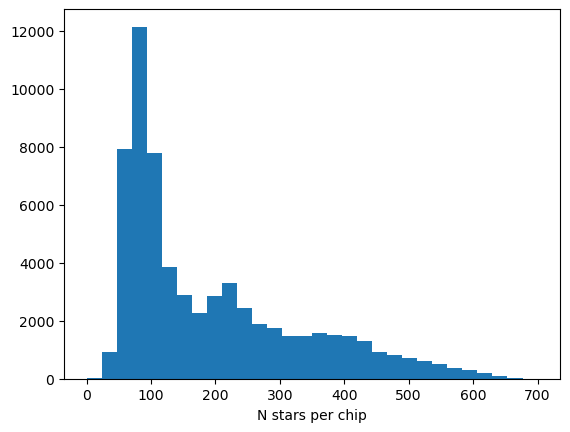

In [131]:
Nstar=np.array(Nstar)
mplot.hist(Nstar[Nstar!=0], range=(0,700), bins=30)
mplot.xlabel('N stars per chip')